## Imports and Helper Functions

In [178]:
import pandas as pd
import mplleaflet
import mapclassify
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import numpy as np

# Replace any number of spaces with just a single space
def refineSpaces(x):
    return x.replace('\s+', ' ', regex=True)

# Remove leading and trailing white space
def removeExcessWhitespace(x):
    return x.str.strip()

# Convert the string to uppercase
def toUpper(x):
    return x.str.upper()


## Data Cleaning

In [147]:
violations = pd.read_csv('data/csv/ParkingViolations/nyc-parking-violations-partial-2015.csv')
violations[['House Number', 'Street Name']] = violations[['House Number', 'Street Name']].apply(refineSpaces)
violations[['House Number', 'Street Name']] = violations[['House Number', 'Street Name']].apply(removeExcessWhitespace)
violations[['House Number', 'Street Name']] = violations[['House Number', 'Street Name']].apply(toUpper)

openmaps = pd.read_csv('data/csv/nyc-address-to-zip-code.csv')
openmaps[['NUMBER', 'STREET']] = openmaps[['NUMBER', 'STREET']].apply(refineSpaces)
openmaps[['NUMBER', 'STREET']] = openmaps[['NUMBER', 'STREET']].apply(removeExcessWhitespace)
openmaps[['NUMBER', 'STREET']] = openmaps[['NUMBER', 'STREET']].apply(toUpper)

# read in mean income data and ensure that row has numeric data
meanIncome = pd.read_csv('data/csv/MeanIncome/nyc-mean-income-2015.csv')
meanIncome = meanIncome[pd.to_numeric(meanIncome['Mean income (dollars); Estimate; All households'], errors='coerce').notnull()]

# read in shape data and turn zcta(zip code) into an int
shapes = gpd.read_file('data/shp/nyc-shape-by-zip')
shapes['zcta'] = shapes['zcta'].astype(int)

print("Done cleaning data.")


Done cleaning data.


# Merge based on address

In [148]:
merged = pd.merge(violations, openmaps,  how='inner', left_on=['House Number','Street Name'], right_on = ['NUMBER','STREET'])

# merge in mean income data based on zip code
merged = pd.merge(merged, meanIncome[['Id2', 'Mean income (dollars); Estimate; All households']], how='inner', left_on=['POSTCODE'], right_on=['Id2'])

# merge in shapefile stuff on zip code
merged = pd.merge(merged, shapes, how='inner', left_on=['POSTCODE'], right_on=['zcta'])

merged.to_csv("generated/nyc-merged-data-all.csv")

print("Done merging data frames.")


(4180, 69)
Done merging data frames.


## Plot violations and shape data

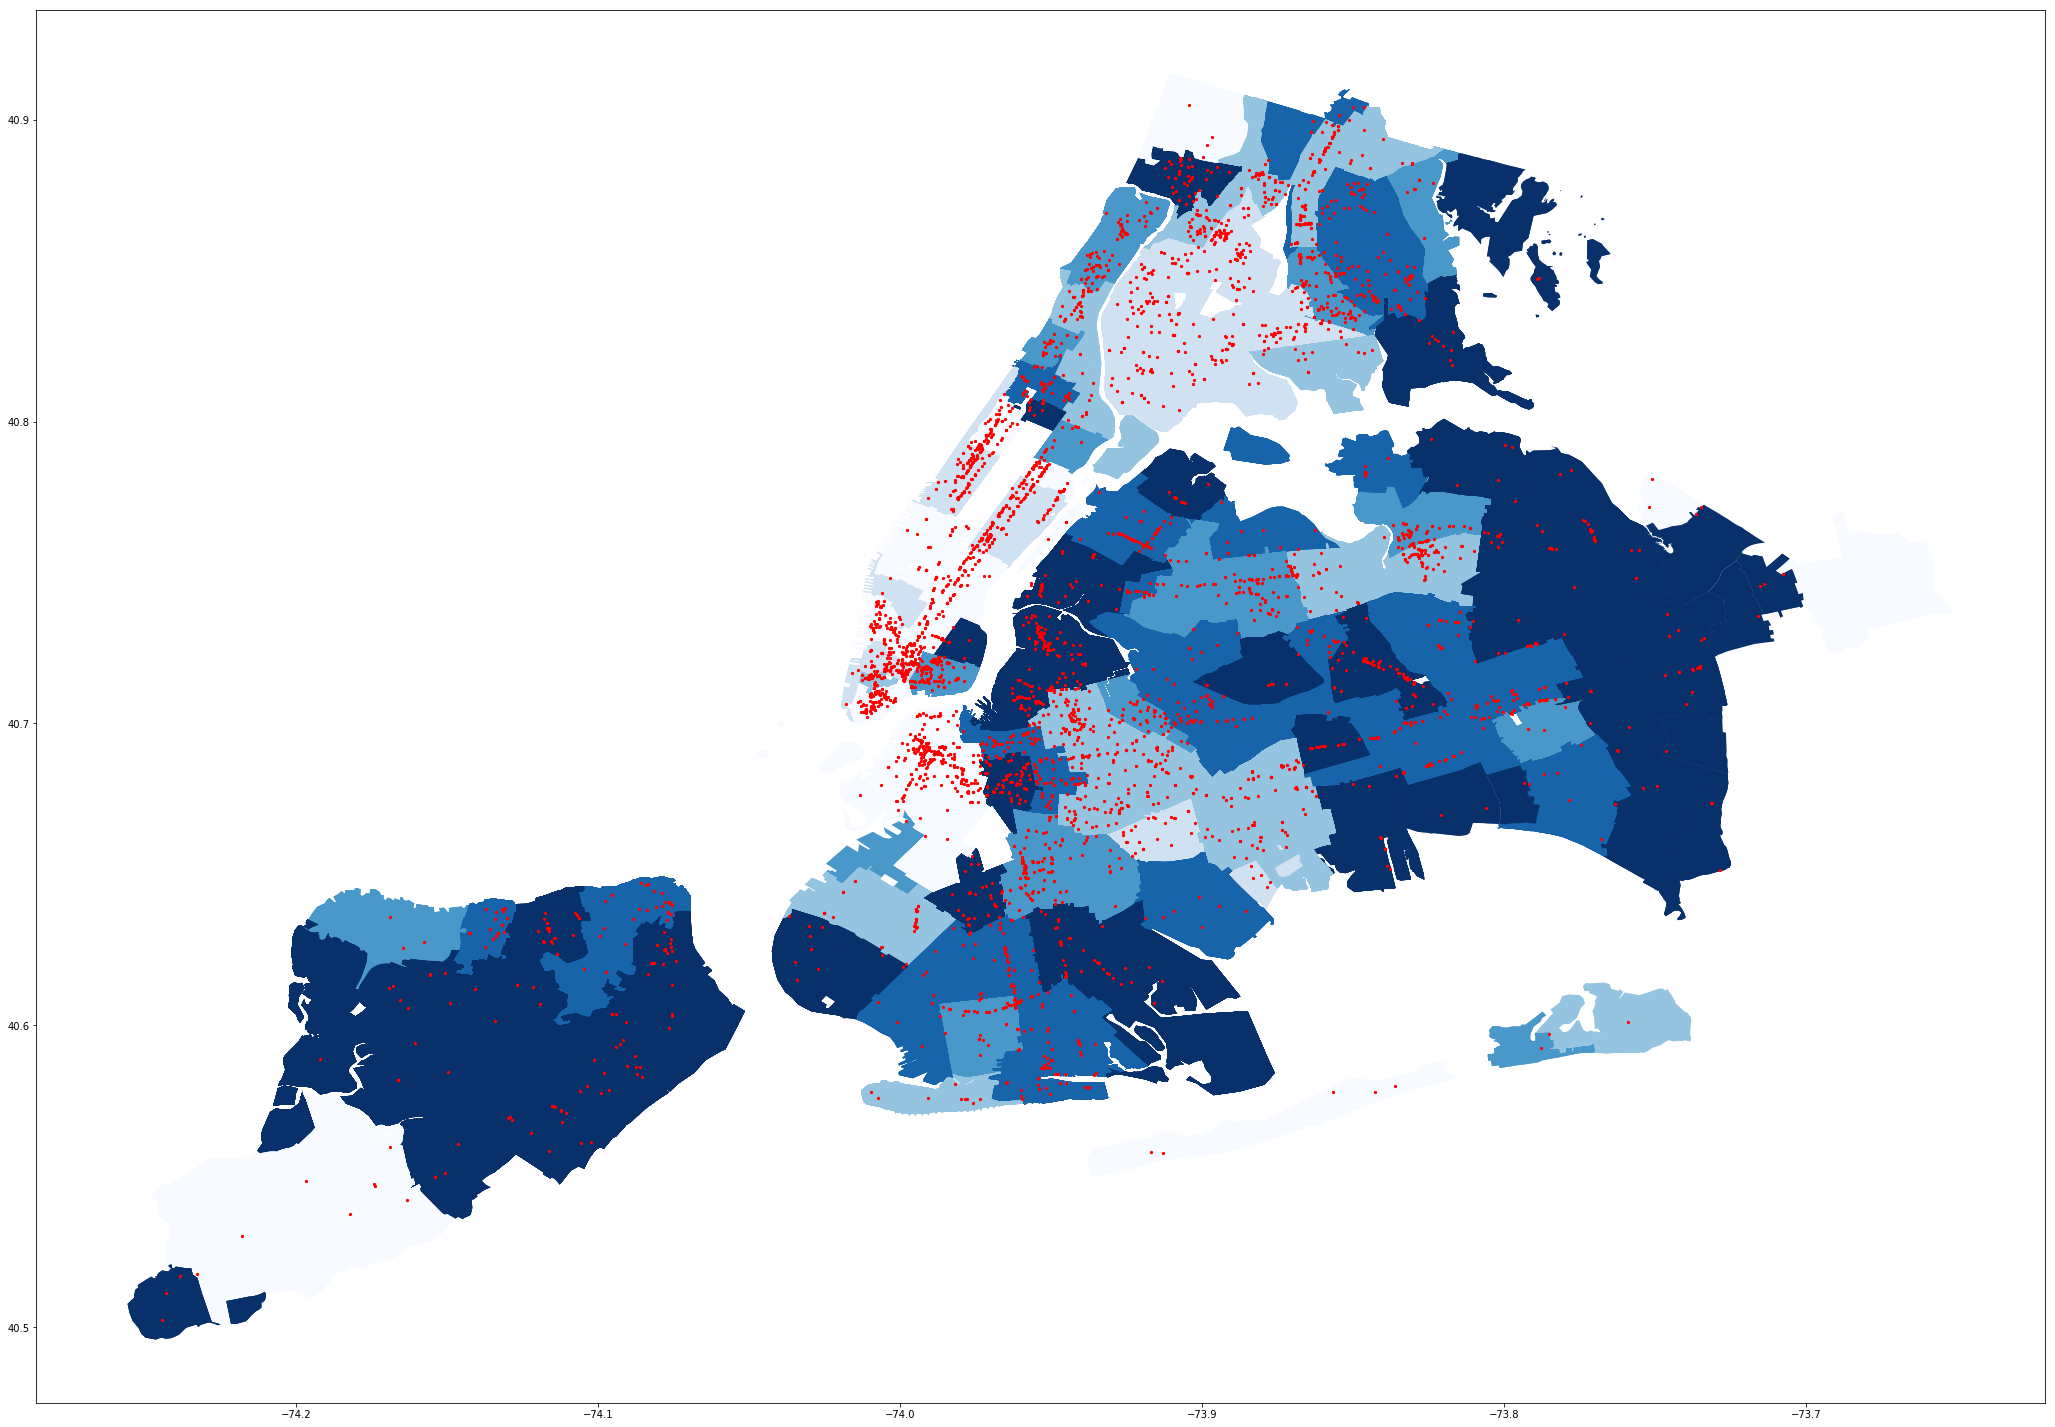

In [212]:
# legend cannot be shown to mplleaflet. comment out the first one if youre plotting to mflleaflet
#ax = GeoDataFrame(merged).plot(column='Mean income (dollars); Estimate; All households',  cmap='Blues', scheme='QUANTILES', k=6, figsize=(36, 36), legend=True)
ax = GeoDataFrame(merged).plot(column='Mean income (dollars); Estimate; All households',  cmap='Blues', scheme='QUANTILES', k=6, figsize=(36, 36))
ax = plt.scatter(merged['LON'], merged['LAT'], marker='o', s=5, color="red")

ax.figure.savefig('generated/mean-income-2015.png', dpi=300)
plt.show()
mplleaflet.save_html(fig=ax.figure, fileobj='generated/mean-income-2015.html')
